In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [156]:
df = pd.read_csv("train.csv", header=None)
new_cols = ['C' + str(i) for i in range(1, 14 + 1)] + ['X' + str(i) for i in range(1, 19 + 2)]
new_cols[-1] = 'Y'
df.columns = new_cols

features = df.loc[:, df.columns != 'Y']

features = features.drop(['C2', 'C3', 'C6', 'C7', 'X19'], axis=1)

numerical_features = features.select_dtypes(include=['float64']).columns
categorical_features = features.select_dtypes(include=['object']).columns
target = df['Y']

features

,C1,C4,C5,C8,C9,C10,C11,C12,C13,C14,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,...,-0.375,-0.924,-0.619,-0.536,-0.092,0.182,0.034,-0.172,0.401,0.393
1,V1,V1,V1,V1,V3,V5,V3,V2,V1,V2,...,-0.527,0.820,0.352,0.073,-0.092,1.098,0.034,1.160,0.401,0.037
2,V1,V1,V1,V1,V2,V2,V1,V2,V1,V1,...,-0.223,-1.823,-1.933,-0.536,-0.092,1.098,0.034,0.716,0.401,0.724
3,V1,V1,V1,V1,V2,V2,V2,V2,V1,V2,...,-0.223,-1.284,-0.762,-0.536,-0.092,1.098,0.034,0.716,0.401,0.712
4,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,...,-0.375,-0.546,-0.505,-0.536,-0.092,0.182,0.034,0.716,0.401,0.393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,V3,V1,NaN,V1,V4,V2,V1,NaN,V2,...,0.172,NaN,NaN,NaN,NaN,-2.568,0.034,NaN,0.401,1.890
396,NaN,V3,V2,V1,V3,V2,V5,V1,NaN,V2,...,0.842,NaN,NaN,NaN,NaN,-4.401,-2.684,NaN,0.401,1.391
397,NaN,V3,V2,NaN,V1,V4,V1,V1,NaN,V2,...,0.242,NaN,NaN,NaN,NaN,0.548,4.926,NaN,0.401,0.992
398,NaN,V3,V1,NaN,V1,V8,V1,V1,NaN,V2,...,0.242,NaN,NaN,NaN,NaN,-1.651,3.567,NaN,0.401,0.992


In [200]:
print((np.count_nonzero(target == 1)/np.count_nonzero(target == -1)) * 100)

68.77637130801688


In [158]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=31, test_size=0.2) #32 is good

In [159]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#TODO Experiment with strategies
iterative_numerical_imputer = IterativeImputer(max_iter=10)
iterative_numerical_imputer.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = iterative_numerical_imputer.transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = iterative_numerical_imputer.transform(X_test.loc[:, numerical_features])

categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_imputer.fit(X_train[categorical_features])
X_train.loc[:, categorical_features] = categorical_imputer.transform(X_train.loc[:, categorical_features])
X_test.loc[:, categorical_features] = categorical_imputer.transform(X_test.loc[:, categorical_features])

X_train

C:\Users\Gábor\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\Gábor\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Gábor\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,C1,C4,C5,C8,C9,C10,C11,C12,C13,C14,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
233,V1,V1,V1,V1,V3,V5,V3,V2,V5,V1,...,-1.315,-0.744000,-0.705000,0.276000,-0.092000,0.548,0.034,0.827000,0.401000,2.247000
8,V2,V2,V2,V2,V4,V6,V2,V2,V1,V1,...,-1.288,1.234000,-0.305000,-0.536000,-0.092000,0.182,0.034,1.160000,0.401000,0.037000
300,V1,V1,V1,V2,V2,V2,V2,V2,V1,V2,...,-2.505,0.568000,0.752000,-0.536000,-0.092000,0.915,0.034,1.160000,0.401000,0.682000
136,V1,V1,V1,V1,V4,V6,V5,V2,V1,V1,...,-1.288,-0.528000,1.237000,-0.536000,-0.092000,-0.735,-1.325,1.160000,0.401000,-1.244000
38,V2,V2,V2,V1,V1,V1,V3,V1,V2,V1,...,-0.680,0.568000,0.752000,1.495000,-0.092000,-1.285,-0.238,-1.060000,0.401000,0.017000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,V1,V1,V3,V2,V3,V5,V1,V2,V1,V2,...,-0.527,-0.025000,0.095000,-0.536000,-0.092000,1.098,-1.053,2.269000,-0.340983,-0.349686
382,V2,V2,V2,V1,V3,V3,V1,V2,V1,V1,...,-0.984,-0.304494,0.101797,-0.207761,-0.024935,0.182,-1.053,0.094492,0.401000,1.211000
16,V2,V1,V2,V1,V1,V4,V2,V1,V3,V1,...,0.994,0.335000,-1.162000,-0.536000,-0.092000,0.182,0.034,0.050000,0.401000,0.872000
87,V2,V2,V2,V1,V1,V7,V2,V1,V2,V2,...,1.754,-0.924000,0.523000,-0.536000,-0.092000,0.182,0.305,-1.060000,0.401000,0.018000


In [160]:
X_train_len = len(X_train)
X = pd.concat([X_train, X_test])
X = pd.get_dummies(X)
X_train = X[:X_train_len]
X_test = X[X_train_len:]
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,C12_V1,C12_V2,C12_V3,C13_V1,C13_V2,C13_V3,C13_V4,C13_V5,C14_V1,C14_V2
233,1.655000,-0.614,0.823000,-0.131849,0.189,-0.513000,2.093000,0.967000,-1.315,-0.744000,...,0,1,0,0,0,0,0,1,1,0
8,-0.059141,-0.738,-0.617000,-0.282000,1.094,1.425000,0.229000,-0.844000,-1.288,1.234000,...,0,1,0,1,0,0,0,0,1,0
300,-0.557000,0.379,0.348000,-0.438000,1.094,-0.010909,-0.209000,-0.844000,-2.505,0.568000,...,0,1,0,1,0,0,0,0,0,1
136,1.378000,0.627,3.226000,-1.221000,-0.716,0.133000,0.625503,-0.202000,-1.288,-0.528000,...,0,1,0,1,0,0,0,0,1,0
38,-2.215000,-1.607,-0.617000,-1.064000,-1.104,-0.513000,-0.648000,-0.844000,-0.680,0.568000,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.549000,1.743,0.579488,1.283000,2.775,-0.513000,2.312000,-0.026000,-0.527,-0.025000,...,0,1,0,1,0,0,0,0,0,1
382,0.207479,0.130,-1.092000,0.501000,-0.458,-2.128000,-0.648000,0.249716,-0.984,-0.304494,...,0,1,0,1,0,0,0,0,1,0
16,0.549000,-0.738,0.348000,-0.282000,-0.328,1.425000,-0.099000,0.324000,0.994,0.335000,...,1,0,0,0,0,1,0,0,1,0
87,0.217000,-0.986,-0.127000,0.501000,0.189,-0.836000,-0.099000,0.485000,1.754,-0.924000,...,1,0,0,0,1,0,0,0,0,1


In [161]:
#X.to_csv("save\X.csv", index=False)
#X_train.to_csv("save\X_train.csv", index=False)
#X_test.to_csv("save\X_test.csv", index=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

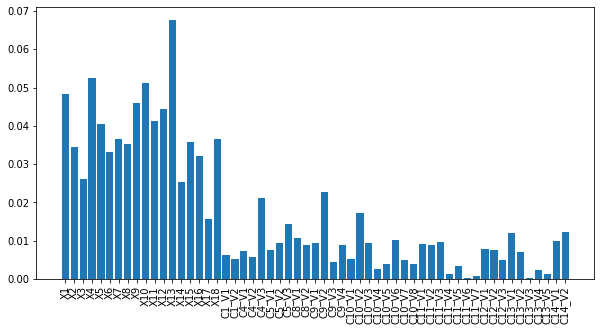

In [162]:

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
plt.figure(figsize=(10,5))
plt.bar(X_train.columns, clf.feature_importances_)
plt.xticks(rotation=90)

In [163]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

classifier1 = RandomForestClassifier(n_estimators=1000)
classifier1.fit(X_train, y_train)
print("Test Score: ", classifier1.score(X_test, y_test))

classifier2 = ExtraTreesClassifier(n_estimators=1000, random_state=10)
classifier2.fit(X_train, y_train)
print("Test Score: ", classifier2.score(X_test, y_test))

Test Score:  0.8625
Test Score:  0.8625


In [164]:
y_pred1 = classifier1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)

print("RandomForestClassifier")
print(cm1)
print(classification_report(y_test, y_pred1))

y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)

print("ExtraTreesClassifier")
print(cm2)
print(classification_report(y_test, y_pred2))

RandomForestClassifier
[[40  4]
 [ 7 29]]
              precision    recall  f1-score   support

          -1       0.85      0.91      0.88        44
           1       0.88      0.81      0.84        36

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80

ExtraTreesClassifier
[[38  6]
 [ 5 31]]
              precision    recall  f1-score   support

          -1       0.88      0.86      0.87        44
           1       0.84      0.86      0.85        36

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



In [165]:
from sklearn.model_selection import GridSearchCV
import time

parameters = {
    'bootstrap': [False],
    'max_depth': [50,60,70],
    'max_features': ['auto'],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [1100, 1250, 1500]
}

grid_search = GridSearchCV(estimator = ExtraTreesClassifier(n_estimators=1000), param_grid = parameters, cv = 5, n_jobs = -1, verbose = 3)

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print("Elapsed time: ", end - start, " seconds, which is: ", (end - start) / 60, " minutes")

model = grid_search.best_estimator_
model

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Elapsed time:  18.713606595993042  seconds, which is:  0.3118934432665507  minutes


ExtraTreesClassifier(max_depth=50, n_estimators=1500)

In [166]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = RandomForestClassifier(n_estimators=1000)
clf2 = BaggingClassifier(n_estimators=1000)
clf3 = ExtraTreesClassifier(n_estimators=1000)

votingclf = VotingClassifier(estimators=[('rf', clf1),  ('bag', clf2), ('et', clf3), ('tuned', model)], voting='hard', weights=[2,1,2,3], flatten_transform=True)
votingclf = votingclf.fit(X_train, y_train)
print("Test Score: ", votingclf.score(X_test, y_test))

y_pred_votingclf = votingclf.predict(X_test)
print(confusion_matrix(y_test, y_pred_votingclf))
print(classification_report(y_test, y_pred_votingclf))
"""
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(votingclf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('>%.3f (%.3f)' % (scores.mean(), scores.std()))
"""
#Test Score:  0.875
#Test Score:  0.925
#Test Score:  0.8375 -X
#Test Score:  0.85
# TODO Check slides, run with different weights wit cross validation, train on full dataset

Test Score:  0.875
[[39  5]
 [ 5 31]]
              precision    recall  f1-score   support

          -1       0.89      0.89      0.89        44
           1       0.86      0.86      0.86        36

    accuracy                           0.88        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.88      0.88      0.88        80



"\ncv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)\nscores = cross_val_score(votingclf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)\nprint('>%.3f (%.3f)' % (scores.mean(), scores.std()))\n"

In [167]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.275
Mean Squared Error: 0.55
Root Mean Squared Error: 0.7416198487095663


In [168]:
from sklearn.linear_model import LogisticRegression

def evaluate_model(X_train, y_train, X_test, y_test, model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	return cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

models, names = list(), list()
# SVM
#models.append(SVC(gamma='auto'))
#names.append('SVM')
# KNN
#models.append(KNeighborsClassifier())
#names.append('KNN')
# Neutral Network
#models.append(MLPClassifier(solver = 'adam', max_iter=1000, tol=0.000001, early_stopping=True, validation_fraction=0.1, n_iter_no_change=20))
#names.append('NEU')
# Bagging
#models.append(BaggingClassifier(n_estimators=1000))
#names.append('BAG')
# ls.append(LogisticRegression())
#names.append('LR')
# RF
models.append(RandomForestClassifier(n_estimators=1000))
names.append(' RF')
# ET
models.append(ExtraTreesClassifier(n_estimators=1000, random_state=10))
names.append(' ET')


results = list()
for i in range(len(models)):
	scores = evaluate_model(X_train, y_train, X_test, y_test, models[i])
	results.append(scores)
	print('>%s %.3f (%.3f)' % (names[i], scores.mean(), scores.std()))
	

> RF 0.794 (0.040)
> ET 0.803 (0.033)


In [169]:
from sklearn.model_selection import RandomizedSearchCV

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

print(random_grid)

{'n_estimators': [1000, 1250, 1500, 1750, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [170]:
import time

rf = ExtraTreesClassifier()

# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
start = time.time()

rf_random.fit(X_train, y_train)

end = time.time()
print("Elapsed time: ", end - start, " seconds, which is: ", (end - start) / 60, " minutes")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Elapsed time:  127.65100002288818  seconds, which is:  2.1275166670481362  minutes


In [171]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [172]:
def evaluate(model, X_test, y_test):
    score = model.score(X_test, y_test)
    print('Accuracy = {:0.2f}%.'.format(score))
    return score
    
base_model = ExtraTreesClassifier(n_estimators = 1000, random_state=10)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

random_accuracy = evaluate(rf_random.best_estimator_, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Accuracy = 0.86%.
Accuracy = 0.82%.
Improvement of -4.35%.


In [173]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [30,40,50,60,70, 80, 90, 100],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [1, 2],
    'n_estimators': [1250, 1500]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 3)

In [174]:
start = time.time()

grid_search.fit(X_train, y_train)

end = time.time()
print("Elapsed time: ", end - start, " seconds, which is: ", (end - start) / 60, " minutes")

grid_search.best_params_

Fitting 3 folds for each of 64 candidates, totalling 192 fits
C:\Users\Gábor\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.82816082 0.82193029        nan        nan
 0.80943984 0.81569976        nan        nan 0.82193029 0.82193029
        nan        nan 0.82504555 0.82501616        nan        nan
 0.82504555 0.83130547        nan        nan 0.83127608 0.81258449
        nan        nan 0.82816082 0.82504555        nan        nan
 0.8219009  0.82501616        nan        nan 0.82813143 0.82193029
        nan        nan 0.81567037 0.83127608        nan        nan
 0.83130547 0.82504555        nan        nan 0.81881502 0.83127608
        nan        nan 0.82816082 0.82504555        nan        nan
 0.82813143 0.82816082        nan        nan 0.83127608 0.82816082
        nan        nan 0.8219009  0.81881502]
  warnings.warn(
Elapsed time:  51.189998149871826

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [179]:
# Fit the grid search to the data

grid_accuracy = evaluate(grid_search.best_estimator_, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
print(confusion_matrix(y_test, y_pred_votingclf))

Accuracy = 0.88%.
Improvement of 1.45%.
[[39  5]
 [ 5 31]]


In [176]:
# Cross valudate
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('>%s %.3f (%.3f)' % ("Best Estimator ", scores.mean(), scores.std()))

>Best Estimator  0.787 (0.041)


# Predicting the original Test Set with X_train

In [195]:
test_to_predict = pd.read_csv("test.csv", header=None)
new_cols = ['C' + str(i) for i in range(1, 14 + 1)] + ['X' + str(i) for i in range(1, 19 + 1)]
test_to_predict.columns = new_cols

test_to_predict = test_to_predict.drop(['C2', 'C3', 'C6', 'C7', 'X19'], axis=1)

numerical_features = test_to_predict.select_dtypes(include=['float64']).columns
categorical_features = test_to_predict.select_dtypes(include=['object']).columns
test_to_predict

,C1,C4,C5,C8,C9,C10,C11,C12,C13,C14,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,V2,V1,V2,V1,V1,V4,V1,V3,V2,V1,...,NaN,-0.241,-0.162,-0.536,-0.092,0.182,2.751,-0.394,0.401,0.724
1,V2,V1,V2,V1,V1,V4,V2,V3,V2,V1,...,NaN,-0.636,0.895,-0.536,-0.092,1.098,1.393,-0.394,0.401,0.724
2,V2,V1,V2,V1,V4,V6,V5,V2,V1,V2,...,-0.223,0.568,0.752,-0.536,-0.092,0.548,-0.782,0.050,0.401,0.018
3,V2,V1,V2,V1,V4,V6,V4,V2,V1,V2,...,-0.223,-0.007,0.095,-0.536,-0.092,-1.651,-1.325,0.050,0.401,0.018
4,V2,V2,V2,V1,V1,V4,V1,V3,V2,V2,...,0.233,1.234,-0.305,-0.536,-0.092,-0.552,1.936,-0.394,0.401,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,V2,V1,V2,V2,V1,V4,V2,V1,V2,V2,...,-0.314,0.658,0.609,-0.536,-0.092,-1.651,1.393,-0.616,-2.574,-0.605
96,V2,V1,V2,V2,V1,V4,V1,V1,V2,V2,...,-0.314,1.090,-0.076,-0.536,-0.092,0.182,5.469,-0.394,-2.574,0.033
97,V1,V1,V1,V2,V3,V5,V3,V2,V1,V2,...,-0.375,-0.133,0.609,-0.536,-0.092,0.182,0.034,1.160,-2.574,-0.605
98,V1,V1,V1,V1,V4,V6,V5,V2,V1,V2,...,-0.375,-1.517,-1.305,-0.536,-0.092,-0.735,-1.053,1.160,-2.574,-0.605


In [196]:
test_to_predict.loc[:, numerical_features] = iterative_numerical_imputer.transform(test_to_predict.loc[:, numerical_features])
test_to_predict.loc[:, categorical_features] = categorical_imputer.transform(test_to_predict.loc[:, categorical_features])

test_to_predict_len = len(test_to_predict)
original = pd.concat([features, test_to_predict])
original = pd.get_dummies(original)
test_to_predict = X[:test_to_predict_len]

In [197]:
test_to_predict

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,C12_V1,C12_V2,C12_V3,C13_V1,C13_V2,C13_V3,C13_V4,C13_V5,C14_V1,C14_V2
233,1.655000,-0.614,0.823000,-0.131849,0.189,-0.513000,2.093000,0.967000,-1.315,-0.744000,...,0,1,0,0,0,0,0,1,1,0
8,-0.059141,-0.738,-0.617000,-0.282000,1.094,1.425000,0.229000,-0.844000,-1.288,1.234000,...,0,1,0,1,0,0,0,0,1,0
300,-0.557000,0.379,0.348000,-0.438000,1.094,-0.010909,-0.209000,-0.844000,-2.505,0.568000,...,0,1,0,1,0,0,0,0,0,1
136,1.378000,0.627,3.226000,-1.221000,-0.716,0.133000,0.625503,-0.202000,-1.288,-0.528000,...,0,1,0,1,0,0,0,0,1,0
38,-2.215000,-1.607,-0.617000,-1.064000,-1.104,-0.513000,-0.648000,-0.844000,-0.680,0.568000,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0.203365,0.503,-1.092000,1.283000,2.128,-0.513000,-0.428000,0.036771,-0.680,-0.207746,...,0,1,0,1,0,0,0,0,0,1
247,-0.439134,-1.111,-0.293023,0.579000,-0.716,-0.513000,-0.099000,-0.844000,0.537,1.126000,...,1,0,0,0,1,0,0,0,0,1
244,2.207000,-1.111,-0.617000,1.675000,2.775,2.071000,-0.648000,1.712000,1.298,-1.284000,...,1,0,0,1,0,0,0,0,0,1
190,1.378000,0.006,0.823000,-0.125000,-1.104,-0.513000,-0.648000,0.777000,0.081,-0.924000,...,1,0,0,1,0,0,0,0,1,0


In [198]:
prediction = grid_search.best_estimator_.predict(test_to_predict)
print("Count(1): ", np.count_nonzero(prediction == 1), "Count(-1): ", np.count_nonzero(prediction == -1))
print((np.count_nonzero(prediction == 1)/np.count_nonzero(prediction == -1)) * 100)

Count(1):  45 Count(-1):  55
81.81818181818183


In [199]:
# Exporting
prediction = pd.DataFrame(prediction)
prediction.to_csv("predictions.csv", index=False, header=False)

In [43]:
# TODO https://datascience.stackexchange.com/questions/75345/need-help-understanding-data-leakage
# TODO https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Predicting the Test Set with Full Training set

In [217]:
df = pd.read_csv("train.csv", header=None)
new_cols = ['C' + str(i) for i in range(1, 14 + 1)] + ['X' + str(i) for i in range(1, 19 + 2)]
new_cols[-1] = 'Y'
df.columns = new_cols

train = df.loc[:, df.columns != 'Y']

train = train.drop(['C2', 'C3', 'C6', 'C7', 'X19'], axis=1)

numerical_features = train.select_dtypes(include=['float64']).columns
categorical_features = train.select_dtypes(include=['object']).columns
y = df['Y']

train

,C1,C4,C5,C8,C9,C10,C11,C12,C13,C14,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,...,-0.375,-0.924,-0.619,-0.536,-0.092,0.182,0.034,-0.172,0.401,0.393
1,V1,V1,V1,V1,V3,V5,V3,V2,V1,V2,...,-0.527,0.820,0.352,0.073,-0.092,1.098,0.034,1.160,0.401,0.037
2,V1,V1,V1,V1,V2,V2,V1,V2,V1,V1,...,-0.223,-1.823,-1.933,-0.536,-0.092,1.098,0.034,0.716,0.401,0.724
3,V1,V1,V1,V1,V2,V2,V2,V2,V1,V2,...,-0.223,-1.284,-0.762,-0.536,-0.092,1.098,0.034,0.716,0.401,0.712
4,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,...,-0.375,-0.546,-0.505,-0.536,-0.092,0.182,0.034,0.716,0.401,0.393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,V3,V1,NaN,V1,V4,V2,V1,NaN,V2,...,0.172,NaN,NaN,NaN,NaN,-2.568,0.034,NaN,0.401,1.890
396,NaN,V3,V2,V1,V3,V2,V5,V1,NaN,V2,...,0.842,NaN,NaN,NaN,NaN,-4.401,-2.684,NaN,0.401,1.391
397,NaN,V3,V2,NaN,V1,V4,V1,V1,NaN,V2,...,0.242,NaN,NaN,NaN,NaN,0.548,4.926,NaN,0.401,0.992
398,NaN,V3,V1,NaN,V1,V8,V1,V1,NaN,V2,...,0.242,NaN,NaN,NaN,NaN,-1.651,3.567,NaN,0.401,0.992


In [218]:
test = pd.read_csv("test.csv", header=None)
new_cols = ['C' + str(i) for i in range(1, 14 + 1)] + ['X' + str(i) for i in range(1, 19 + 1)]
test.columns = new_cols

test = test.drop(['C2', 'C3', 'C6', 'C7', 'X19'], axis=1)

numerical_features = test.select_dtypes(include=['float64']).columns
categorical_features = test.select_dtypes(include=['object']).columns

test

,C1,C4,C5,C8,C9,C10,C11,C12,C13,C14,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,V2,V1,V2,V1,V1,V4,V1,V3,V2,V1,...,NaN,-0.241,-0.162,-0.536,-0.092,0.182,2.751,-0.394,0.401,0.724
1,V2,V1,V2,V1,V1,V4,V2,V3,V2,V1,...,NaN,-0.636,0.895,-0.536,-0.092,1.098,1.393,-0.394,0.401,0.724
2,V2,V1,V2,V1,V4,V6,V5,V2,V1,V2,...,-0.223,0.568,0.752,-0.536,-0.092,0.548,-0.782,0.050,0.401,0.018
3,V2,V1,V2,V1,V4,V6,V4,V2,V1,V2,...,-0.223,-0.007,0.095,-0.536,-0.092,-1.651,-1.325,0.050,0.401,0.018
4,V2,V2,V2,V1,V1,V4,V1,V3,V2,V2,...,0.233,1.234,-0.305,-0.536,-0.092,-0.552,1.936,-0.394,0.401,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,V2,V1,V2,V2,V1,V4,V2,V1,V2,V2,...,-0.314,0.658,0.609,-0.536,-0.092,-1.651,1.393,-0.616,-2.574,-0.605
96,V2,V1,V2,V2,V1,V4,V1,V1,V2,V2,...,-0.314,1.090,-0.076,-0.536,-0.092,0.182,5.469,-0.394,-2.574,0.033
97,V1,V1,V1,V2,V3,V5,V3,V2,V1,V2,...,-0.375,-0.133,0.609,-0.536,-0.092,0.182,0.034,1.160,-2.574,-0.605
98,V1,V1,V1,V1,V4,V6,V5,V2,V1,V2,...,-0.375,-1.517,-1.305,-0.536,-0.092,-0.735,-1.053,1.160,-2.574,-0.605


In [219]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_numerical_imputer = IterativeImputer(max_iter=100)
iterative_numerical_imputer.fit(features[numerical_features])
train.loc[:, numerical_features] = iterative_numerical_imputer.transform(train.loc[:, numerical_features])
test.loc[:, numerical_features] = iterative_numerical_imputer.transform(test.loc[:, numerical_features])

categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_imputer.fit(features[categorical_features])
train.loc[:, categorical_features] = categorical_imputer.transform(train.loc[:, categorical_features])
test.loc[:, categorical_features] = categorical_imputer.transform(test.loc[:, categorical_features])

train

,C1,C4,C5,C8,C9,C10,C11,C12,C13,C14,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,...,-0.375,-0.924000,-0.619000,-0.536000,-0.092000,0.182,0.034,-0.172000,0.401,0.393
1,V1,V1,V1,V1,V3,V5,V3,V2,V1,V2,...,-0.527,0.820000,0.352000,0.073000,-0.092000,1.098,0.034,1.160000,0.401,0.037
2,V1,V1,V1,V1,V2,V2,V1,V2,V1,V1,...,-0.223,-1.823000,-1.933000,-0.536000,-0.092000,1.098,0.034,0.716000,0.401,0.724
3,V1,V1,V1,V1,V2,V2,V2,V2,V1,V2,...,-0.223,-1.284000,-0.762000,-0.536000,-0.092000,1.098,0.034,0.716000,0.401,0.712
4,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,...,-0.375,-0.546000,-0.505000,-0.536000,-0.092000,0.182,0.034,0.716000,0.401,0.393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,V2,V3,V1,V1,V1,V4,V2,V1,V1,V2,...,0.172,0.031111,0.204139,0.332693,-0.014215,-2.568,0.034,-0.521930,0.401,1.890
396,V2,V3,V2,V1,V3,V2,V5,V1,V1,V2,...,0.842,0.268684,0.520153,0.164137,-0.085657,-4.401,-2.684,-1.110923,0.401,1.391
397,V2,V3,V2,V1,V1,V4,V1,V1,V1,V2,...,0.242,0.664367,0.408371,0.331851,-0.001259,0.548,4.926,-0.044944,0.401,0.992
398,V2,V3,V1,V1,V1,V8,V1,V1,V1,V2,...,0.242,0.847706,0.645246,0.355555,-0.015672,-1.651,3.567,-0.403745,0.401,0.992


In [229]:
train_len = len(train)
X = pd.concat([train, test])
X = pd.get_dummies(X)
train = X[:train_len]
test = X[train_len:]

In [224]:
from sklearn.model_selection import GridSearchCV
import time

parameters = {
    'bootstrap': [False],
    'max_depth': [50, 60, 70],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [1100, 1250, 1500]
}

grid_search = GridSearchCV(estimator = ExtraTreesClassifier(n_estimators=1000), param_grid = parameters, cv = 5, n_jobs = -1, verbose = 3)

start = time.time()
grid_search.fit(train, y)
end = time.time()
print("Elapsed time: ", end - start, " seconds, which is: ", (end - start) / 60, " minutes")

model = grid_search.best_estimator_
model

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Elapsed time:  74.97100043296814  seconds, which is:  1.2495166738828023  minutes


ExtraTreesClassifier(max_depth=60, min_samples_split=3, n_estimators=1250)

In [230]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = RandomForestClassifier(n_estimators=1000)
clf2 = BaggingClassifier(n_estimators=1000)
clf3 = ExtraTreesClassifier(n_estimators=1000)

votingclf = VotingClassifier(estimators=[('rf', clf1),  ('bag', clf2), ('et', clf3), ('tuned', model)], voting='hard', weights=[2,1,2,3], flatten_transform=True)
votingclf = votingclf.fit(train, y)

y_pred = votingclf.predict(test)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(votingclf, train, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('>%.3f (%.3f)' % (scores.mean(), scores.std()))

# TODO Check slides, run with different weights wit cross validation, train on full dataset

>0.830 (0.033)


In [231]:
# Exporting
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv("y_pred.csv", index=False, header=False)